In [222]:
# IMPORTING REQUIRED LIBRARIES

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [86]:
# READING THE "DIABETES" FILE 
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 1. Please do the basic exploration of data and explain missing values, number of rows and columns and data types in statistical term.

In [87]:
# GETTING THE COMPLETE INFORMATION OF THE DIABETES DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [88]:
# GETTING THE SHAPE OF THE DATASET
df.shape

(768, 9)

In [89]:
# GETTING THE SIZE OF THE DATASET
df.size

6912

In [90]:
# PRINTING THE FIRST 5 ROWS USING head() FUNCTION
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
# PRINTING LAST 5 ROWS USING tail() FUNCTION
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [93]:
# TO CHECK IF THE DATA CONTAINS NULL VALUES
df.isnull().values.any()

False

In [94]:
# describing the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### CLEANING THE DATA

* Minimum values for many variables are 0.
* As biological parameters like Glucose, BP, Skin thickness, Insulin & BMI cannot have zero values, looks like null values have been coded as zeros
* As a next step, find out how many zero values are included in each variable

In [95]:
(df.Pregnancies == 0).sum(), (df.Glucose == 0).sum(), (df.BloodPressure == 0).sum(), (df.SkinThickness == 0).sum(), (df.Insulin  == 0).sum(), (df.BMI == 0).sum(), (df.DiabetesPedigreeFunction == 0).sum(), (df.Age == 0).sum()
# COUNTING CELLS WITH 0 VALUES FOR EACH VARIABLE AND PUBLISHING THE COUNTS BELOW

(111, 5, 35, 227, 374, 11, 0, 0)

#### SEPERATING "NON- DIABETIC DATA" AND "DIABETIC DATA" :

In [150]:
## SEPERATING NON DIABETIC('0') AND DIABETIC DATA('1') FROM OUTCOME VARIABLE
## AND REPLACING THE 0'S WITH MEDIAN OF THE SAME VARIABLE  

df1 = df[df.Outcome == 0]
df2 = df[df.Outcome == 1]
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [171]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,27,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


###### REPLACING MEDIAN VALUE WITH 0'S :

In [281]:
## FINDING MEDIAN OF BOTH NON-DIA AND DIA 
## AND REPLACING THE 0'S WITH MEDIAN OF "GLUCOSE" IN BOTH NON DIABETES AND DIABETES

df1 = df1.replace({'Glucose':0}, np.median(df1["Glucose"]))
df2 = df2.replace({'Glucose':0}, np.median(df2["Glucose"]))

## FINDING MEDIAN OF BOTH NON-DIA AND DIA 
## AND REPLACING THE 0'S WITH MEDIAN OF "BLOODPRESSURE" IN BOTH NON DIABETES AND DIABETES

df1 = df1.replace({'BloodPressure':0}, np.median(df1["BloodPressure"]))
df2 = df2.replace({'BloodPressure':0}, np.median(df2["BloodPressure"]))

## FINDING MEDIAN OF BOTH NON-DIA AND DIA 
## AND REPLACING THE 0'S WITH MEDIAN OF "SKINTHICKNESS" IN BOTH NON DIABETES AND DIABETES

df1 = df1.replace({'SkinThickness':0}, np.median(df1["SkinThickness"]))
df2 = df2.replace({'SkinThickness':0}, np.median(df2["SkinThickness"]))

## FINDING MEDIAN OF BOTH NON-DIA AND DIA 
## AND REPLACING THE 0'S WITH MEDIAN OF "INSULIN" IN BOTH NON DIABETES AND DIABETES

df1 = df1.replace({'Insulin':0}, np.median(df1["Insulin"]))
df2 = df2.replace({'Insulin':0}, np.median(df2["Insulin"]))

## FINDING MEDIAN OF BOTH NON-DIA AND DIA 
## AND REPLACING THE 0'S WITH MEDIAN OF "BMI" IN BOTH NON DIABETES AND DIABETES

df1 = df1.replace({'BMI':0}, np.median(df1["BMI"]))
df2 = df2.replace({'BMI':0}, np.median(df2["BMI"]))

In [282]:
## CHECKING FIRST 5 OBSERAVATIONS FROM NON_DIABETIC AFTER CLEANING THE DATA
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,39,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,21,39,25.6,0.201,30,0
7,10,115,70,21,39,35.3,0.134,29,0
10,4,110,92,21,39,37.6,0.191,30,0


In [283]:
## CHECKING FIRST 5 OBSERAVATIONS FROM DIABETIC AFTER CLEANING THE DATA
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,27,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [189]:
## CONCATINATING THE BOTH NON DIABETIC AND DIABETIC AFTER CLEANING DATA 
## AND CREATING NEW DATA AS "diabetes_data"

dia_data = [df1, df2]
diabetes_data = pd.concat(dia_data)
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,39,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,21,39,25.6,0.201,30,0
7,10,115,70,21,39,35.3,0.134,29,0
10,4,110,92,21,39,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,27,0,36.3,0.258,52,1
759,6,190,92,27,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [176]:
# TO CHECK THE VARIABLES AND OBSERVATIONS PRESENT IN THE DATA AFTER CLEANING THE DATA
diabetes_data.shape

(768, 9)

In [215]:
# TO CHECK THE SIZE OF DATA AFTER CLEANING THE DATA
diabetes_data.size

6912

In [216]:
# CHECKING THE INFORMATION OF THE NEW DATA 
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 76.2 KB


In [175]:
# DESCRIBING THE DATA AFTER CLEANING THE DATA
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.378906,27.43099,91.783854,32.433919,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.104431,9.32146,108.121136,6.880664,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.00000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.00000,39.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,27.00000,39.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.00000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.00000,846.000000,67.100000,2.420000,81.000000,1.000000


In [178]:
# CHECKING THE DATATYPE OF THE GIVEN DATA
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## 2. Calculate appropriate measures of central tendency for Glucose and outcome column only?

#### SEPERATING "NONDIABETIC" AND "DIABETIC" FOR MEASURING OF CENTRAL TENDENCY :

In [179]:
# AGAIN SEPERATING THE NONDIABETES AND DIABETES FROM OUTCOME VARIABLE AFTER CLEANING THE DATA AND CREATING AS NEW DATA FOR BETTER UNDERSTANDING 
# O - REPRESENTED AS NON DIABETES
# 1 - REPRESENTED AS DIABETES

df1_non_dia = diabetes_data[diabetes_data.Outcome==0]
df1_dia = diabetes_data[diabetes_data.Outcome==1]

In [180]:
# TO CHECK THE TOP 5 OBSERVATION FROM NON DIABETES DATA
df1_non_dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,39,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,21,39,25.6,0.201,30,0
7,10,115,70,21,39,35.3,0.134,29,0
10,4,110,92,21,39,37.6,0.191,30,0


In [181]:
# TO CHECK THE TOP 5 OBSERVATIONS FROM DIABETES DATA
df1_dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,27,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [182]:
## IMPORTANT MEASURES OF CENTRAL TENDENCY ARE 'MEAN','MEDIAN', AND 'MODE'
## FINDING AND PRINING THE MEAN, MEDIAN AND MODE OF GLUCOSE WITH NON-DIABETES

print("mean of the Glucose with non-diabetes :", df1_non_dia["Glucose"].mean())
print("median of the Glucose with non-diabetes :", df1_non_dia["Glucose"].median())
print("mode of the Glucose with non-diabetes :", df1_non_dia["Glucose"].mode())

mean of the Glucose with non-diabetes : 110.622
median of the Glucose with non-diabetes : 107.0
mode of the Glucose with non-diabetes : 0    99
dtype: int64


In [190]:
## FINDING AND PRINTING THE MEAN, MEDIAN, AND MODE OF GLUCOSE WITH DIABETES

print("mean of the Glucose with diabetes :", df1_dia["Glucose"].mean())
print("median of the Glucose with diabetes :", df1_dia["Glucose"].median())
print("mode of the Glucose with diabetes :", df1_dia["Glucose"].mode())

mean of the Glucose with diabetes : 142.30223880597015
median of the Glucose with diabetes : 140.0
mode of the Glucose with diabetes : 0    125
dtype: int64


In [185]:
## CHECKING THE ONLY MODE FOR OUTCOMES
## BECAUSE WE CAN'T TAKE MEAN AND MEDIAN FOR CATEGORICAL DATA

print("mode of the outcome :", diabetes_data["Outcome"].mode())

mode of the outcome : 0    0
dtype: int64


## 3. Please provide 5 points data summaries for required columns?

    * In my opinion Main 5 required columns are - Glucose, BloodPressure, Insuline, BMI and Age

###### Five point data summeries for "Glucose" :

In [294]:
## FINDING AND PRINTING THE FIVE POTNTS DATA SUMMERIES 
## MINMUM, 25%(quartile1), 50%, 75%(quartile3), AND MAXIMUM VALUES OF "Glucose" 

## USING min() function, TO CHECK THE MINIMUM VALUE 
## USING quantile(0.25) function, TO CHECK THE 25th % OF DATA
## USING quantile(0.5) function, TO CHECK THE 50th % OF DATA
## USING quantile(0.75) function, TO CHECK THE 75th % OF DATA
## USING max() function, TO CHECK THE MAXIMUM VALUE 

print("min : ", diabetes_data["Glucose"].min())
print("25% : ", diabetes_data.Glucose.quantile(0.25))
print("50% : ", diabetes_data.Glucose.quantile(0.5))
print("75% : ", diabetes_data.Glucose.quantile(0.75))
print("max : ", diabetes_data["Glucose"].max())

min :  44
25% :  99.75
50% :  117.0
75% :  140.25
max :  199


###### Five point data summeries for "BloodPressure" :

In [295]:
## FINDING AND PRINTING THE FIVE POTNTS DATA SUMMERIES 
## MINMUM, 25%(quartile1), 50%, 75%(quartile3), AND MAXIMUM VALUES OF "BloodPressure"

print("min : ", diabetes_data["BloodPressure"].min())
print("25% : ", diabetes_data.BloodPressure.quantile(0.25))
print("50% : ", diabetes_data.BloodPressure.quantile(0.5))
print("75% : ", diabetes_data.BloodPressure.quantile(0.75))
print("max : ", diabetes_data["BloodPressure"].max())

min :  24
25% :  64.0
50% :  72.0
75% :  80.0
max :  122


###### Five point data summeries for "Insulin" :

In [277]:
## FINDING AND PRINTING THE FIVE POTNTS DATA SUMMERIES
## MINMUM, 25%(quartile1), 50%, 75%(quartile3), AND MAXIMUM VALUES OF "Insulin"

print("min : ", diabetes_data["Insulin"].min())
print("25% : ", diabetes_data.Insulin.quantile(0.25))
print("50% : ", diabetes_data.Insulin.quantile(0.5))
print("75% : ", diabetes_data.Insulin.quantile(0.75))
print("max : ", diabetes_data["Insulin"].max())

min :  0
25% :  39.0
50% :  39.0
75% :  127.25
max :  846


###### Five point data summeries for "BMI" :

In [285]:
## FINDING AND PRINTING THE FIVE POTNTS DATA SUMMERIES 
## MINMUM, 25%(quartile1), 50%, 75%(quartile3), AND MAXIMUM VALUES OF "BMI"

print("min : ", diabetes_data["BMI"].min())
print("25% : ", diabetes_data.BMI.quantile(0.25))
print("50% : ", diabetes_data.BMI.quantile(0.5))
print("75% : ", diabetes_data.BMI.quantile(0.75))
print("max : ", diabetes_data["BMI"].max())

min :  18.2
25% :  27.5
50% :  32.05
75% :  36.6
max :  67.1


###### Five point data summeries for "Age" :

In [284]:
## FINDING AND PRINTING THE FIVE POTNTS DATA SUMMERIES 
## MINMUM, 25%(quartile1), 50%, 75%(quartile3), AND MAXIMUM VALUES OF "Age"

print("min : ", diabetes_data["Age"].min())
print("25% : ", diabetes_data.Age.quantile(0.25))
print("50% : ", diabetes_data.Age.quantile(0.5))
print("75% : ", diabetes_data.Age.quantile(0.75))
print("max : ", diabetes_data["Age"].max())

min :  21
25% :  24.0
50% :  29.0
75% :  41.0
max :  81


## 4. Please create an appropriate plot to examine the relationship between Age and Glucose.

#### USING "SCATTER PLOT" TO EXAMINE THE RELATIONSHIP :

Text(0.5, 1.0, 'Scatter plot to show the Relationship between Age and Glucose')

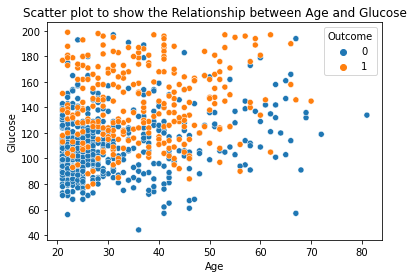

In [218]:
## "SCATTER PLOT" IS BEST PLOT FOR EXAMINE THE RELATIONSHIP BETWEEN "Age" AND "Glucose" 
sns.scatterplot(x = "Age", y = "Glucose", hue = "Outcome", data = diabetes_data)

## giving the syntax to print xlable as "Age" and ylable as "Glucose"
plt.xlabel("Age")
plt.ylabel("Glucose")

## Giving the title for graph
plt.title("Scatter plot to show the Relationship between Age and Glucose") 

## 5. Please create an appropriate plot to see the distribution of Outcome variable?

####  DISTRIBUTION OF 'OUTCOME' :

<AxesSubplot:title={'center':'Distribution of Outcome'}, xlabel='Outcome', ylabel='count'>

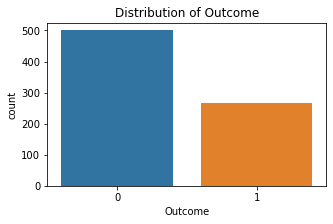

In [192]:
## COUNTPLOT IS BEST TO SEE THE DISTRIBUTION OF 'Outcome'

plt.figure(figsize=(5,3))
plt.title("Distribution of Outcome")
sns.countplot(x=diabetes_data.Outcome)

## 6. Please examine the distribution of numerical data and explain which variable normally distributed and which variable is seems to be skewed. Please also tell the direction of skewness.

#### USING "HISTPLOT" TO GET DISTRIBUTION OF NUMERICAL DATA :

<AxesSubplot:title={'center':'Distribution of Age'}, xlabel='Age', ylabel='Count'>

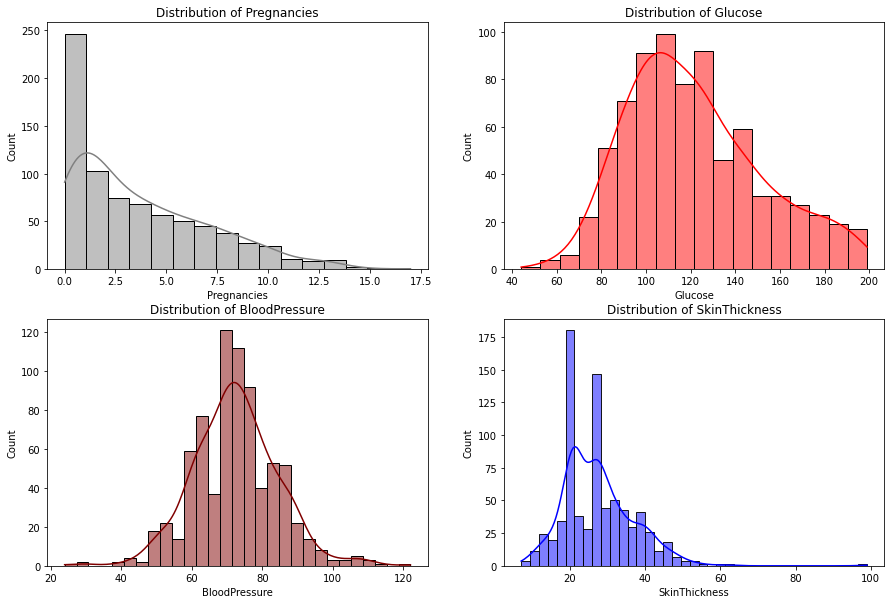

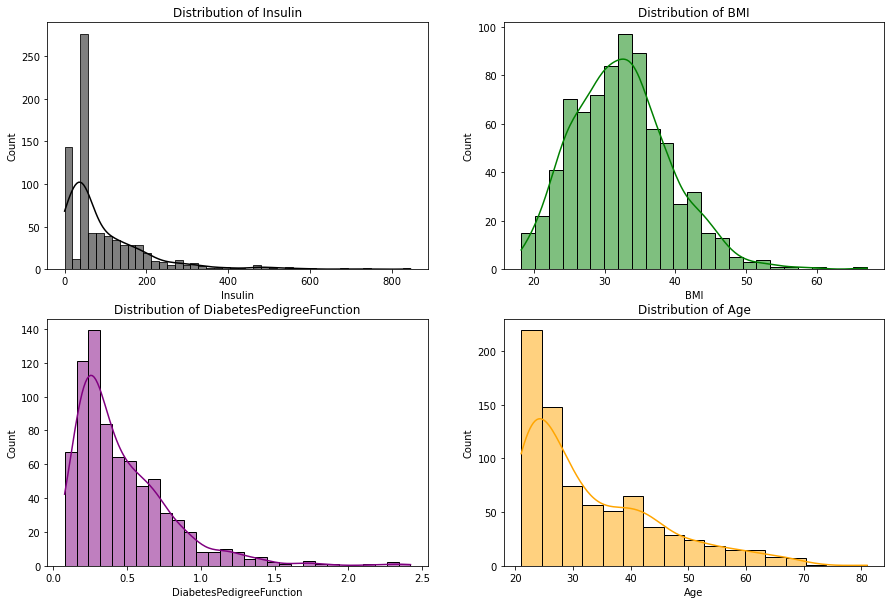

In [198]:
## GIVING THE FIGURE SIZE
## USING SUBPLOT FUNCTION TO CREATE MULTIPLE PLOTS IN A SINGLE PLOT
## AND GIVING TITLES TO EVERY VARIABLE OUTPUT

## AND BY USING "histplot()", DISTRIBUTING THE NUMERICAL DATA FROM IN THE GIVEN DATA

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Distribution of Pregnancies")
sns.histplot(diabetes_data,x="Pregnancies",color="gray", kde=True)

plt.subplot(2,2,2)
plt.title("Distribution of Glucose")
sns.histplot(diabetes_data, x="Glucose", color="red", kde=True)

plt.subplot(2,2,3)
plt.title("Distribution of BloodPressure")
sns.histplot(diabetes_data, x="BloodPressure", color="maroon", kde=True)

plt.subplot(2,2,4)
plt.title("Distribution of SkinThickness")
sns.histplot(diabetes_data, x="SkinThickness", color="blue", kde=True)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Distribution of Insulin")
sns.histplot(diabetes_data,x="Insulin",color="black", kde=True)

plt.subplot(2,2,2)
plt.title("Distribution of BMI")
sns.histplot(diabetes_data, x="BMI", color="green", kde=True)

plt.subplot(2,2,3)
plt.title("Distribution of DiabetesPedigreeFunction")
sns.histplot(diabetes_data, x="DiabetesPedigreeFunction", color="purple", kde=True)

plt.subplot(2,2,4)
plt.title("Distribution of Age")
sns.histplot(diabetes_data, x="Age", color="orange", kde=True)


* SKEWED VARIABLES :    
  * Variables Pregnancies, Insulin, Glucose, SkinThickness, DiabetesPedigreeFunction, BMI, and Age are seems to be skewed
* Variable 'BloodPressure' is seems to be normally distributed
* DIRECTION OF SKEWENESS :
  * And the variables Glucose and BMI are moderately right skewed 
  * And remaining variables Pregnancies, Insulin, SkinThickness, DiabetesPedigreeFunction and Age are highly right skewed

## 7. Please calculate the skewness value and divide variables into symmetrical, moderately skewed and highly skewed.

* WE ARE GOING TO FIND THE DISTRIBUTION OF DATA FROM OBTAINED SKEWNESS VALUE
* IF THE SKEWNESS VALUE IS BETWEEN ["-0.5 TO 0.5"], THEN THAT DATA IS "NORMALLY DISTRIBUTED"
* IF THE SKEWNESS VALUES IS BETWEEN ["-1 TO -0.5 OR 0.5 TO 1"], THEN IT IS "MODERATELY SKEWED"
* IF THE VALUE IS ["ABOVE (-1) OR ABOVE(+1)"], THEN IT IS "HIGHLY SKEWED"

#### CHECHING THE SKEWNESS VALUES :

In [246]:
## FIND THE SKEWNESS VALUE FOR "Pregnancies" BY USING .skew( ) FUNCTION

diabetes_data["Pregnancies"].skew()

0.9016739791518584

        - So, the value is between 0.5 to 1,
        - It is "moderately skewed"

In [247]:
## FIND THE SKEWNESS VALUE FOR "Glucose" BY USING .skew( ) FUNCTION

diabetes_data["Glucose"].skew()

0.5323242439691904

        - So, the value is between 0.5 to 1,
        - It is "moderately skewed"

In [248]:
## FIND THE SKEWNESS VALUE FOR "" BY USING .skew( ) FUNCTION

diabetes_data["BloodPressure"].skew()

0.14341321214943537

        - So, the value is between -0.5 to 0.5,
        - It is "SYMMETRICAL DATA or Normally distributed"

In [249]:
## FIND THE SKEWNESS VALUE FOR "SkinThickness" BY USING .skew( ) FUNCTION

diabetes_data["SkinThickness"].skew()

1.1287427462705328

        - So, the value is more than 1
        - It is "highly right skewed"

In [250]:
## FIND THE SKEWNESS VALUE FOR "Insulin" BY USING .skew( ) FUNCTION

diabetes_data["Insulin"].skew()

2.5242526791482933

        - So, the value is more than 1 (>+1)
        - It is "highly right skewed"

In [251]:
## FIND THE SKEWNESS VALUE FOR "BMI" BY USING .skew( ) FUNCTION

diabetes_data["BMI"].skew()

0.6066504576484507

        - So, the value is between 0.5 to 1,
        - It is "moderately skewed"

In [252]:
## FIND THE SKEWNESS VALUE FOR "DiabetesPedigreeFunction" BY USING .skew( ) FUNCTION

diabetes_data["DiabetesPedigreeFunction"].skew()

1.9199110663072034

        - So, the value is more than 1 (>+1)
        - It is "highly right skewed"

In [253]:
## FIND THE SKEWNESS VALUE FOR "Age" BY USING .skew( ) FUNCTION

diabetes_data["Age"].skew()

1.1295967011444807

       - So, the skewness value is more than 1 (>+1)
       - It is "highly right skewed"

##### SYMMETRICAL DATA :
      * variable - "BloodPressure"
##### MODERATELY SKEWED :
      * variables - "Pregnancies", "Glucose", and "BMI"
##### HIGHLY SKEWED :
      * variables - "SkinThickness", "Insulin", "DiabetesPedigreeFunction", and "Age"
      

# 8. Please create appropriate plot to examine the outliers of these variables. Please name the variables which have outliers.

#### USING "BOX PLOT" TO EXAMINE THE OUTLIERS :

<AxesSubplot:title={'center':'Boxplot for Age'}, xlabel='Age'>

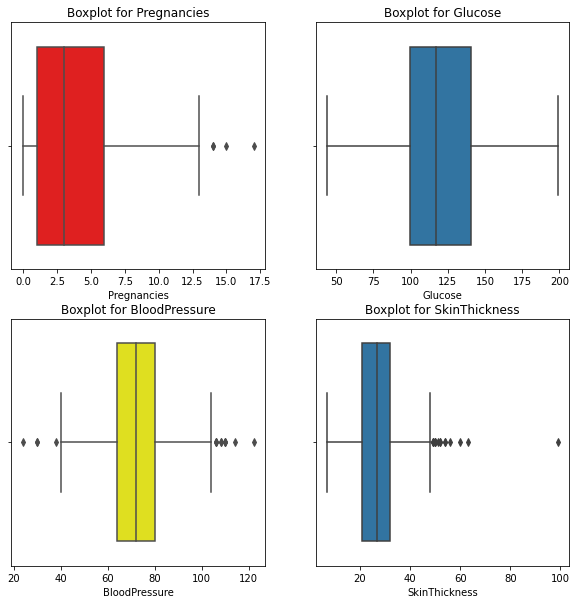

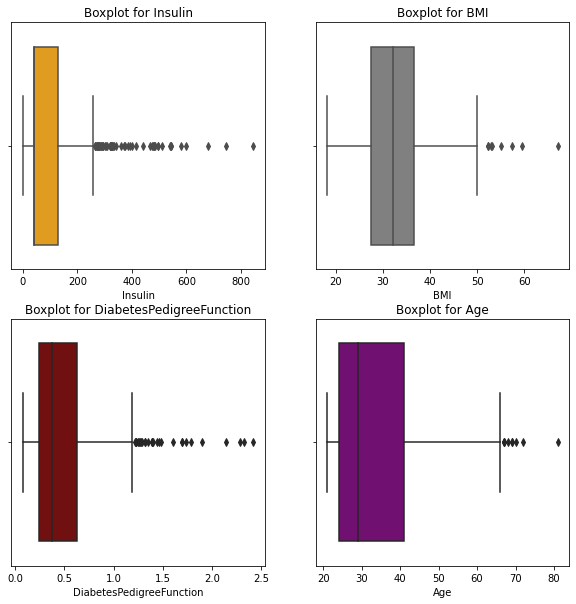

In [210]:
## GIVING THE FIGURE SIZE
## USING SUBPLOT FUNCTION TO CREATE MULTIPLE PLOTS IN A SINGLE PLOT
## AND GIVING TITLES TO EVERY VARIABLE

## AND BY USING "boxplot()", WE CAN EASILY EXAMINE THE OUTLIERS OF THESE VARIABLES

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title("Boxplot for Pregnancies")
sns.boxplot(diabetes_data.Pregnancies, color= "red")

plt.subplot(2,2,2)
plt.title("Boxplot for Glucose")
sns.boxplot(diabetes_data.Glucose)

plt.subplot(2,2,3)
plt.title("Boxplot for BloodPressure")
sns.boxplot(diabetes_data.BloodPressure, color= "yellow")

plt.subplot(2,2,4)
plt.title("Boxplot for SkinThickness")
sns.boxplot(diabetes_data.SkinThickness)

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title("Boxplot for Insulin")
sns.boxplot(diabetes_data.Insulin, color= "orange")

plt.subplot(2,2,2)
plt.title("Boxplot for BMI")
sns.boxplot(diabetes_data.BMI, color = "gray")

plt.subplot(2,2,3)
plt.title("Boxplot for DiabetesPedigreeFunction")
sns.boxplot(diabetes_data.DiabetesPedigreeFunction, color= "maroon")

plt.subplot(2,2,4)
plt.title("Boxplot for Age")
sns.boxplot(diabetes_data.Age, color= "purple")

       ** Variables - Pregnancies, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age are having      outliers
       ** Only Glucose is not having outlier
       ** for variable insulin there are outile , 
          - quartile1(25th %) and median are same. That's why median line is occuring on 25th percentile

 ## 9. What should be the measures of central tendency and dispersion for skewed data?  

######  Measure of central tendancy for skewed data is median
       - The median is the most informative measure of central tendancy for skewed data.

In [293]:
## measures of central tendency for skewed data is median only
## printing the median values of skewed data using median( ) function
## printing the all values

print("median for variable - pregnancies              : ", diabetes_data["Pregnancies"].median())
print("median for variable - Glucose                  : ", diabetes_data["Glucose"].median())
print("median for variable - SkinThickness            : ", diabetes_data['SkinThickness'].median())
print("median for variable - Insulin                  : ", diabetes_data['Insulin'].median())
print("median for variable - BMI                      : ", diabetes_data["BMI"].median())
print("median for variable - DiabetesPedigreeFunction : ", diabetes_data['DiabetesPedigreeFunction'].median())
print("median for variable - Age                      : ", diabetes_data['Age'].median())      

median for variable - pregnancies              :  3.0
median for variable - Glucose                  :  117.0
median for variable - SkinThickness            :  27.0
median for variable - Insulin                  :  39.0
median for variable - BMI                      :  32.05
median for variable - DiabetesPedigreeFunction :  0.3725
median for variable - Age                      :  29.0


###### Measure of dispersion for skewed data is STADARD DEVIATION (SD) :

In [298]:
## measures of dispersion for skewed data is SD only
## printing the SD values of skewed data using std( ) function
## printing the all values

print("SD for variable - pregnancies              : ", diabetes_data["Pregnancies"].std())
print("SD for variable - Glucose                  : ", diabetes_data["Glucose"].std())
print("SD for variable - SkinThickness            : ", diabetes_data['SkinThickness'].std())
print("SD for variable - Insulin                  : ", diabetes_data['Insulin'].std())
print("SD for variable - BMI                      : ", diabetes_data["BMI"].std())
print("SD for variable - DiabetesPedigreeFunction : ", diabetes_data['DiabetesPedigreeFunction'].std())
print("SD for variable - Age                      : ", diabetes_data['Age'].std())  

SD for variable - pregnancies              :  3.369578062698866
SD for variable - Glucose                  :  30.464160589122212
SD for variable - SkinThickness            :  9.321460459341553
SD for variable - Insulin                  :  108.12113612959918
SD for variable - BMI                      :  6.8806640911371995
SD for variable - DiabetesPedigreeFunction :  0.3313285950127748
SD for variable - Age                      :  11.760231540678665


## 10. Please push the assignment into your github account and provide the link of github account.

In [ ]:
https://github.com/KiranKumar8186